In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load and clean data
df = pd.read_csv(r'C:\Users\ADMIN\Desktop\EV_Data_Analysis\CSV\Electric_Vehicle_Population_Data.csv')
df = df.dropna(subset=['Model Year', 'Make', 'Electric Vehicle Type'])

In [12]:
# Simplify vehicle type classification
df['EV_Type'] = df['Electric Vehicle Type'].map({
    'Battery Electric Vehicle (BEV)': 'BEV',
    'Plug-in Hybrid Electric Vehicle (PHEV)': 'PHEV'
})

# Create count by year and type
type_by_year = df.groupby(['Model Year', 'EV_Type']).size().unstack()
type_by_year

EV_Type,BEV,PHEV
Model Year,,
2000,7.0,NaN
2002,2.0,NaN
2003,1.0,NaN
2008,22.0,NaN
2010,21.0,2.0
2011,611.0,69.0
2012,680.0,810.0
2013,2689.0,1541.0
2014,1656.0,1751.0


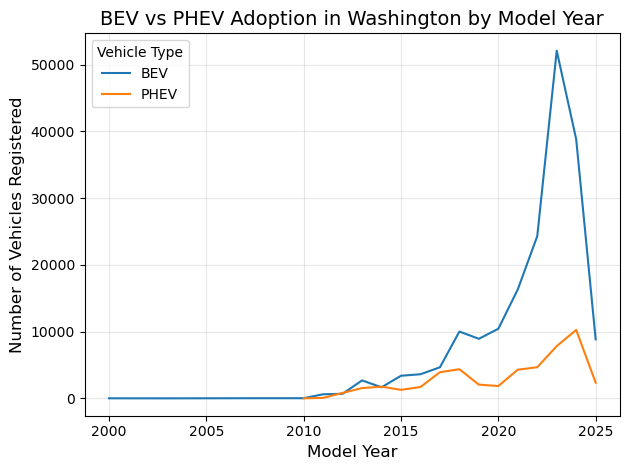

In [13]:
# Plot the trend
type_by_year.plot(kind='line')
plt.title('BEV vs PHEV Adoption in Washington by Model Year', fontsize=14)
plt.xlabel('Model Year', fontsize=12)
plt.ylabel('Number of Vehicles Registered', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend(title='Vehicle Type')
plt.tight_layout()
plt.show()

<Figure size 2000x800 with 0 Axes>

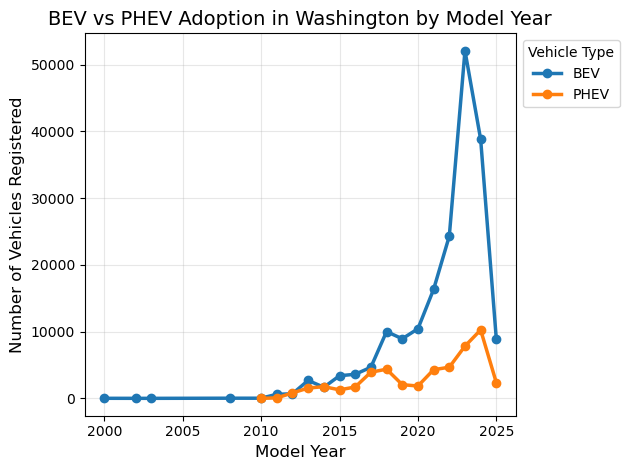

In [11]:
# Plot the trend
plt.figure(figsize=(20, 8))
type_by_year.plot(kind='line', marker='o', linewidth=2.5)
plt.title('BEV vs PHEV Adoption in Washington by Model Year', fontsize=14)
plt.xlabel('Model Year', fontsize=12)
plt.ylabel('Number of Vehicles Registered', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend(title='Vehicle Type', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

In [15]:
# Create a combined 'Make_Model' column for better identification
df['Make_Model'] = df['Make'] + ' ' + df['Model']

# Get the top 10 selling models
top_models = df['Make_Model'].value_counts().nlargest(10)

# Print the top 10 models
print("\nTop 10 Selling EV Models in Washington:")
print(top_models.sort_values(ascending=False))




Top 10 Selling EV Models in Washington:
Make_Model
TESLA MODEL Y          49253
TESLA MODEL 3          36065
NISSAN LEAF            13814
TESLA MODEL S           7885
CHEVROLET BOLT EV       7278
TESLA MODEL X           6535
FORD MUSTANG MACH-E     5109
VOLKSWAGEN ID.4         4842
CHEVROLET VOLT          4709
JEEP WRANGLER           4425
Name: count, dtype: int64


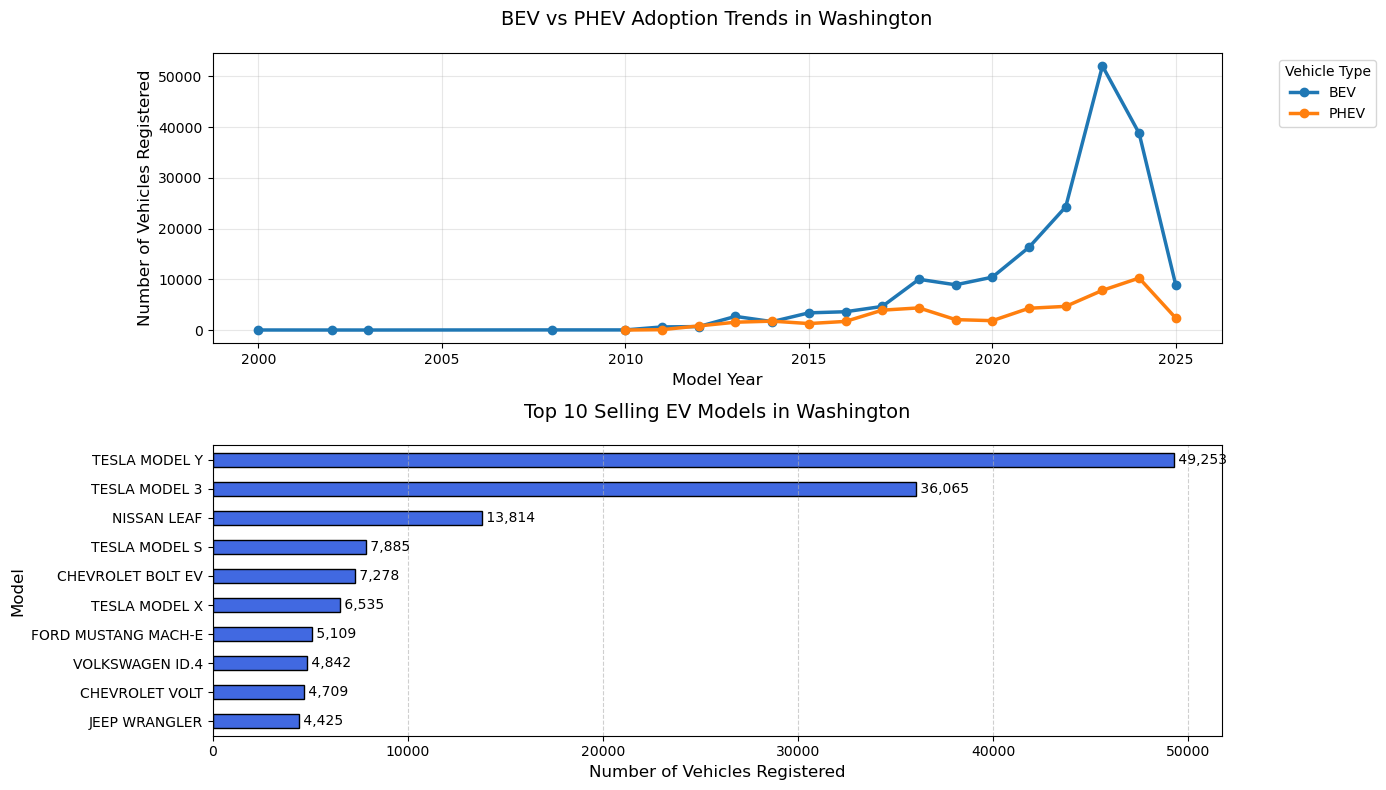

In [18]:
# Plotting
plt.figure(figsize=(14, 8))

# --- Plot 1: Top 10 Selling Models (Bar Graph) ---
plt.subplot(2, 1, 2)
top_models.sort_values().plot(kind='barh', color='royalblue', edgecolor='black')
plt.title('Top 10 Selling EV Models in Washington', fontsize=14, pad=20)
plt.xlabel('Number of Vehicles Registered', fontsize=12)
plt.ylabel('Model', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Add value labels to each bar
for index, value in enumerate(top_models.sort_values()):
    plt.text(value, index, f' {value:,}', va='center')

# --- Plot 2: BEV vs PHEV Adoption Trend (Line Chart) ---
plt.subplot(2, 1, 1)

# Simplify vehicle types
df['EV_Type'] = df['Electric Vehicle Type'].map({
    'Battery Electric Vehicle (BEV)': 'BEV',
    'Plug-in Hybrid Electric Vehicle (PHEV)': 'PHEV'
})

# Get counts by year and type
type_by_year = df.groupby(['Model Year', 'EV_Type']).size().unstack()

# Plot BEV vs PHEV
type_by_year.plot(kind='line', marker='o', linewidth=2.5, ax=plt.gca())
plt.title('BEV vs PHEV Adoption Trends in Washington', fontsize=14, pad=20)
plt.xlabel('Model Year', fontsize=12)
plt.ylabel('Number of Vehicles Registered', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend(title='Vehicle Type', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()



<Figure size 1400x800 with 0 Axes>

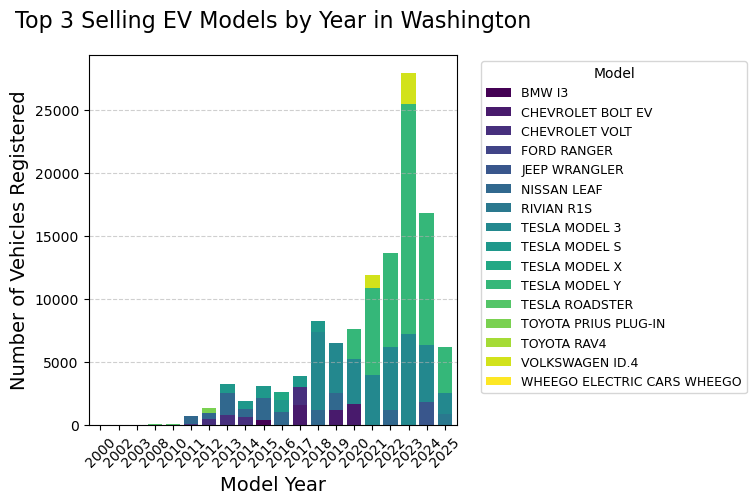

In [19]:
# Get top 3 models per year
top_models = (
    df.groupby(['Model Year', 'Make_Model'])
    .size()
    .reset_index(name='Count')
    .sort_values(['Model Year', 'Count'], ascending=[True, False])
    .groupby('Model Year')
    .head(3)
)

# Pivot and plot
plt.figure(figsize=(14, 8))
ax = top_models.pivot(index='Model Year', columns='Make_Model', values='Count').plot(
    kind='bar', stacked=True, colormap='viridis', width=0.8
)

plt.title('Top 3 Selling EV Models by Year in Washington', fontsize=16, pad=20)
plt.xlabel('Model Year', fontsize=14)
plt.ylabel('Number of Vehicles Registered', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Move legend outside with smaller font
plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=9)
plt.subplots_adjust(right=0.7)  # Make space for legend

# --- Plot 2: BEV vs PHEV Adoption Trend (Line Chart) ---
plt.subplot(2, 1, 1)

# Simplify vehicle types
df['EV_Type'] = df['Electric Vehicle Type'].map({
    'Battery Electric Vehicle (BEV)': 'BEV',
    'Plug-in Hybrid Electric Vehicle (PHEV)': 'PHEV'
})

# Get counts by year and type
type_by_year = df.groupby(['Model Year', 'EV_Type']).size().unstack()

# Plot BEV vs PHEV
type_by_year.plot(kind='line', marker='o', linewidth=2.5, ax=plt.gca())
plt.title('BEV vs PHEV Adoption Trends in Washington', fontsize=14, pad=20)
plt.xlabel('Model Year', fontsize=12)
plt.ylabel('Number of Vehicles Registered', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend(title='Vehicle Type', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

# --- Plot 2: BEV vs PHEV Adoption Trend (Line Chart) ---
plt.subplot(2, 1, 1)

# Simplify vehicle types
df['EV_Type'] = df['Electric Vehicle Type'].map({
    'Battery Electric Vehicle (BEV)': 'BEV',
    'Plug-in Hybrid Electric Vehicle (PHEV)': 'PHEV'
})

# Get counts by year and type
type_by_year = df.groupby(['Model Year', 'EV_Type']).size().unstack()

# Plot BEV vs PHEV
type_by_year.plot(kind='line', marker='o', linewidth=2.5, ax=plt.gca())
plt.title('BEV vs PHEV Adoption Trends in Washington', fontsize=14, pad=20)
plt.xlabel('Model Year', fontsize=12)
plt.ylabel('Number of Vehicles Registered', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend(title='Vehicle Type', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

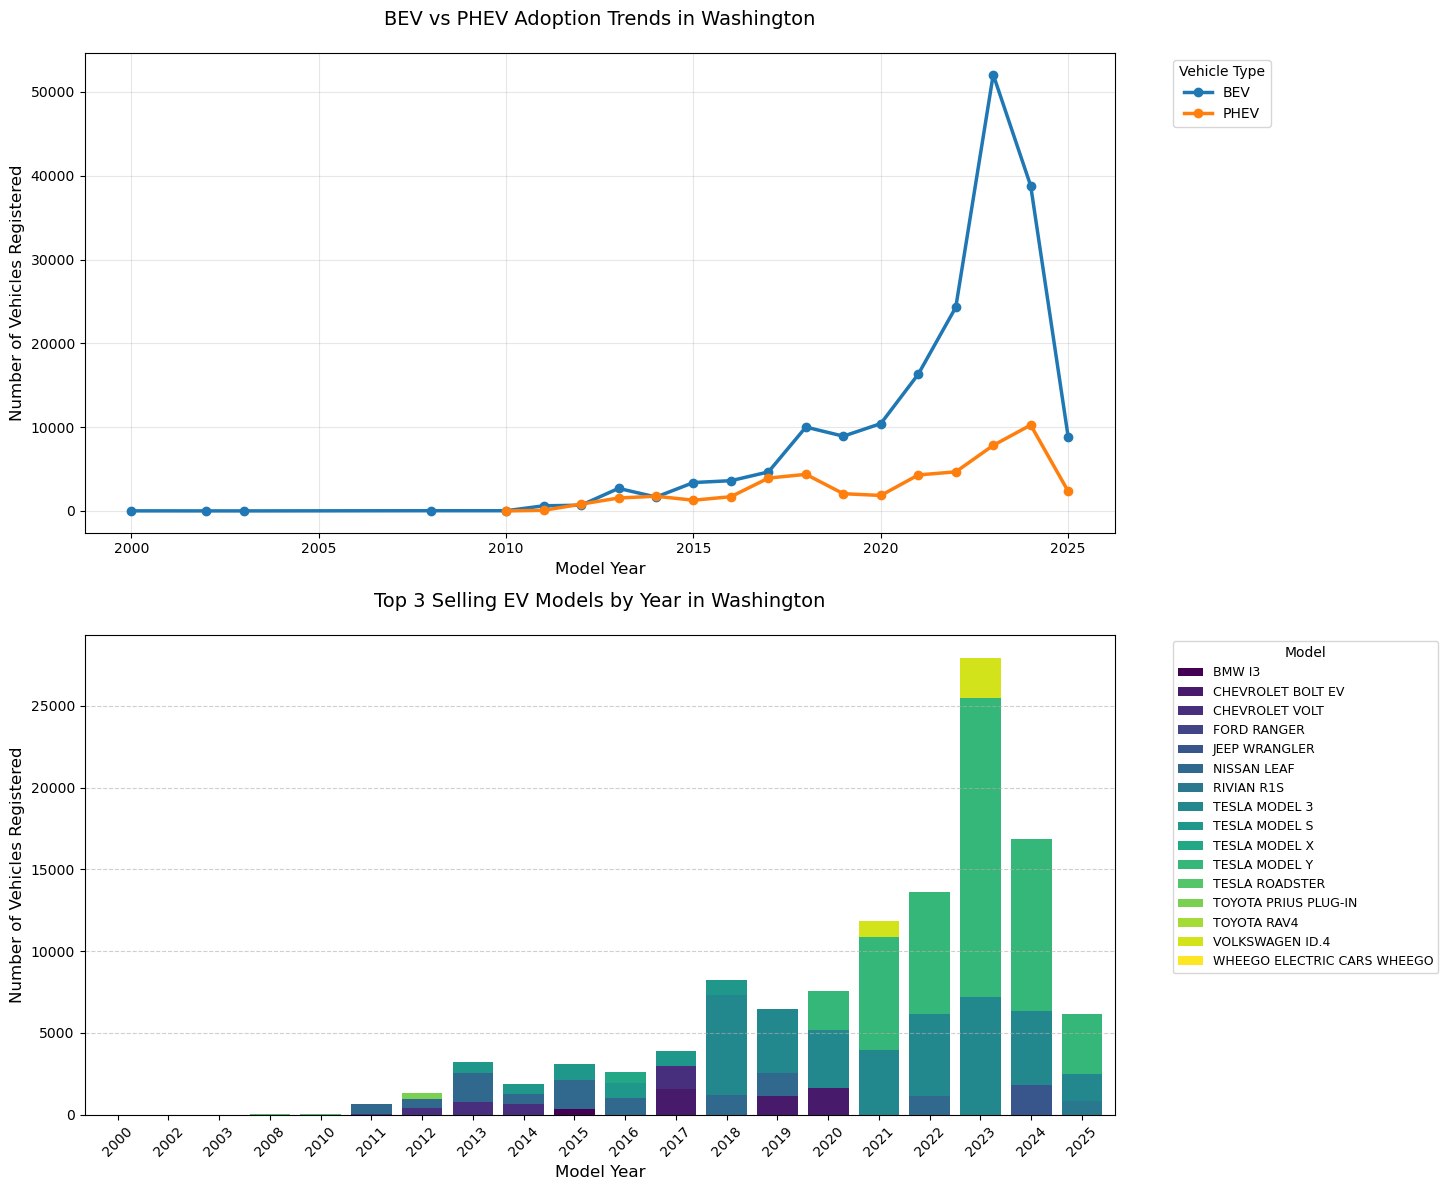

In [20]:
# Create figure with two subplots
plt.figure(figsize=(14, 12))

# --- Plot 1: BEV vs PHEV Adoption Trend ---
plt.subplot(2, 1, 1)  # 2 rows, 1 column, first plot

# Simplify vehicle types
df['EV_Type'] = df['Electric Vehicle Type'].map({
    'Battery Electric Vehicle (BEV)': 'BEV',
    'Plug-in Hybrid Electric Vehicle (PHEV)': 'PHEV'
})

# Get counts by year and type
type_by_year = df.groupby(['Model Year', 'EV_Type']).size().unstack()

# Plot BEV vs PHEV
type_by_year.plot(kind='line', marker='o', linewidth=2.5, ax=plt.gca())
plt.title('BEV vs PHEV Adoption Trends in Washington', fontsize=14, pad=20)
plt.xlabel('Model Year', fontsize=12)
plt.ylabel('Number of Vehicles Registered', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend(title='Vehicle Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# --- Plot 2: Top 3 Selling Models by Year ---
plt.subplot(2, 1, 2)  # 2 rows, 1 column, second plot

# Get top 3 models per year
top_models = (
    df.groupby(['Model Year', 'Make_Model'])
    .size()
    .reset_index(name='Count')
    .sort_values(['Model Year', 'Count'], ascending=[True, False])
    .groupby('Model Year')
    .head(3)
)

# Pivot and plot
top_models.pivot(index='Model Year', columns='Make_Model', values='Count').plot(
    kind='bar', stacked=True, colormap='viridis', width=0.8, ax=plt.gca()
)

plt.title('Top 3 Selling EV Models by Year in Washington', fontsize=14, pad=20)
plt.xlabel('Model Year', fontsize=12)
plt.ylabel('Number of Vehicles Registered', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=9)

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(right=0.8)  # Make space for legends
plt.show()